# Overview
In this assignment we, use the $scipy.signal$ module to solve LTI systems. We solve the damping oscillator problem, coupled springs problem and the RLC circuit finally.

# Code and Generated Outputs
Importing required libraries.

In [1]:
from pylab import *
import scipy.signal as sp

## Damped Oscillator
We are given :
$$f(t)=cos(1.5t)*exp(-0.5t)*u_0(t),$$
So,
$$F(s) = \frac{s+0.5}{(s+0.5)^2+2.25}$$
We have our damping equation as :
$$\ddot{x}+2.25x=f(t)$$
So,
$$X(s) = \frac{F(s)}{s^2+2.25}$$

The function $springResponse$ takes decay constant and frequency as parameters and plots $x$ versus $t$ for $0<t<50$. $x(t)$ is computed using the $scipy.impulse$ function from $X(s)$. We plot the graphs for decay constants $0.5$ and $0.05$.

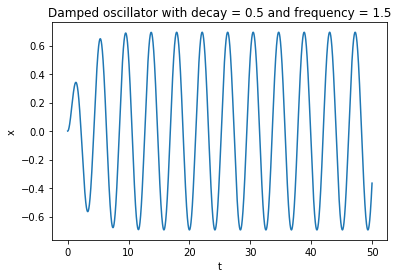

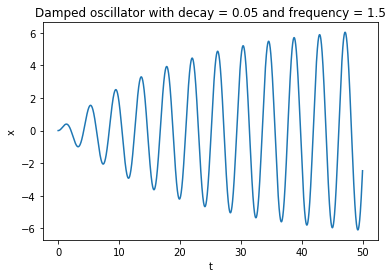

In [2]:
def springResponse(f,d,t):
    X = sp.lti([1,d],polymul([1,0,2.25],[1,2*d,d**2+f**2]))
    t,x = sp.impulse(X,None,linspace(0,t,5001))
    title("Damped oscillator with decay = "+str(d)+" and frequency = "+str(f))
    xlabel('t')
    ylabel('x')
    plot(t,x)
    show()
springResponse(1.5,0.5,50)
springResponse(1.5,0.05,50)

Now, for the same decay constant, we vary the frequency from $1.4$ to $1.6$ and see the variation in the plots.

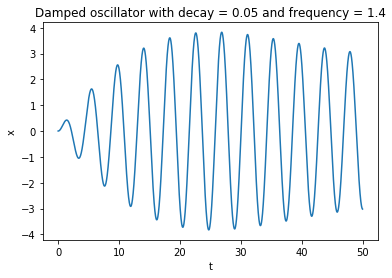

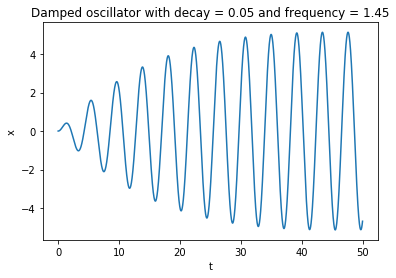

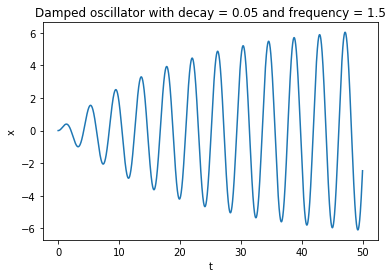

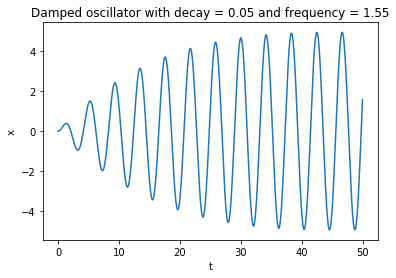

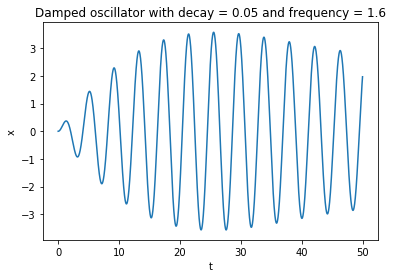

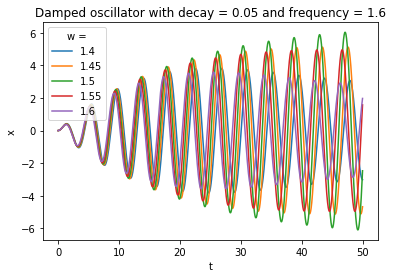

In [3]:
for f in arange(1.4,1.61,0.05):
    springResponse(f,0.05,50)
    
def springResponse(f,d,t):
    X = sp.lti([1,d],polymul([1,0,2.25],[1,2*d,d**2+f**2]))
    t,x = sp.impulse(X,None,linspace(0,t,5001))
    title("Damped oscillator with decay = "+str(d)+" and frequency = "+str(f))
    xlabel('t')
    ylabel('x')
    plot(t,x)
    
for f in arange(1.4,1.61,0.05):
    springResponse(f,0.05,50)
legend(['1.4','1.45','1.5','1.55','1.6'],title='w =')
show()

Since the resonant frequency is 1.5, we observe the maximum amplitude to be occuring at at that frequency.

## Coupled spring problem
We are given :
$$\ddot{x} +x-y=0$$
$$\ddot{y}+2(y-x)=0$$
$$x(0)=1$$
and other initial conditions to be zero. Solving it, we get :
$$X(s)=\frac{s^2+2}{s^3+3s}$$
$$Y(s)=\frac{2}{s^3+3s}$$

Using the above results, we use those values in $scipy.lti$ and plot them.

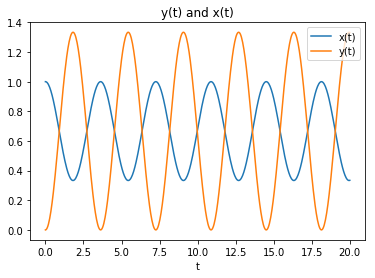

In [4]:
X = sp.lti([1,0,2],[1,0,3,0])
Y = sp.lti([2],[1,0,3,0])
t,x = sp.impulse(X,None,linspace(0,20,501))
plot(t,x)
t,x = sp.impulse(Y,None,linspace(0,20,501))
title("y(t) and x(t)")
xlabel('t')
plot(t,x)
legend(['x(t)','y(t)'],loc = 'upper right')
show()

## RLC Circuit
For the given circuit :
$$\frac{V_o(s)}{V_i(s)}=\frac{1}{LCs^2+RCs+1}$$

We use the values given, obtain bode plots using $signal.bode$ and plot them.

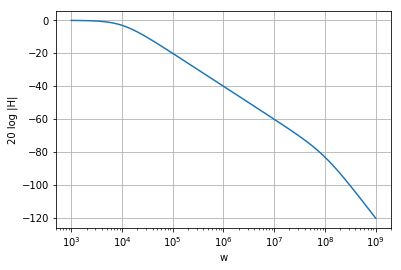

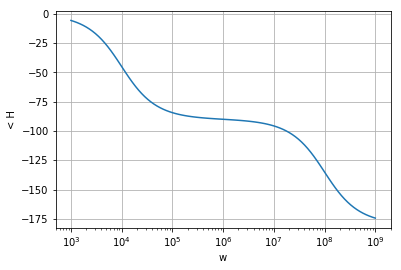

In [5]:
R = 100
L = 10**-6
C = 10**-6
H = sp.lti([1],[L*C,R*C,1])
w,S,phi = H.bode()
ylabel('20 log |H|')
semilogx(w,S)
grid()
xlabel('w')
show()
ylabel('< H')
semilogx(w,phi)
xlabel('w')
grid()
show()

Now that we have the transfer function, we are given an input :
$$v_i(t)=(cos(10^3t)-cos(10^6t))*u(t)$$
Using the transfer function calculated above and the $signal.lsim$, the response is calculated and plotted for two case.  
The first case is for $0<t<30\mu s$.

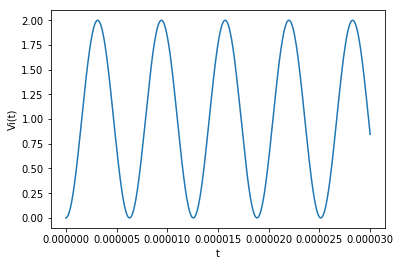

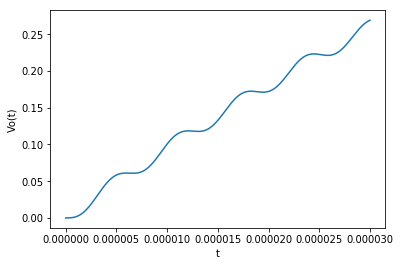

In [6]:
t = np.linspace(0,30*(10**-6),10000)
vi = cos(1000*t)-cos(10**6*t)
t,vo,_ = sp.lsim(H,vi,t)
plot(t,vi)
xlabel('t')
ylabel('Vi(t)')
show()
plot(t,vo)
xlabel('t')
ylabel('Vo(t)')
show()

Next, we plot the long term response, i.e for $0<t<30ms$.

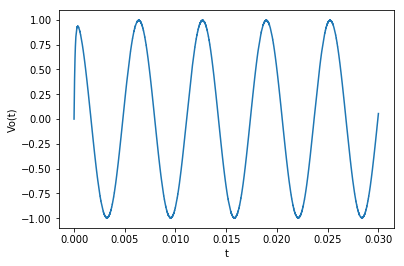

In [7]:
t = np.linspace(0,30*(10**-3),10000)
vi = cos(1000*t)-cos(10**6*t)
t,vo,_ = sp.lsim(H,vi,t)
plot(t,vo)
xlabel('t')
ylabel('Vo(t)')
show()

# Conclusion
In this assignment, we used $scipy$'s signal processing library to solve some LTI systems.